In [1]:
import seaborn as sns

In [2]:
count = 0
count_total = 0
receptors_confident = []
ligand_confident = []
ligand_length_list = []
with open("20241210_single_pass_confident.csv", "w") as ofile, open("20241210_single_pass_full_list.csv", "w") as ofile_full_list:
    ofile.write(f"experiment name\tranking_confidence\treceptor\tpropeptide\tpeptide\n")
    ofile_full_list.write(f"experiment name\tranking_confidence\treceptor\tpropeptide\tpeptide\n")
    for line in open("single_pass_scores.txt"):
        experiment_name, confidence_score = line.strip().split()
        receptor_name = "_".join(experiment_name.split("_")[:2])
        propeptide_name = "_".join(experiment_name.split("_")[2:-3])
        ligand_name = "_".join(experiment_name.split("_")[2:-1])
        ligand_length = int(experiment_name.split("_")[-2]) - int(experiment_name.split("_")[-3]) + 1
        confidence_score = float(confidence_score)

        count_total += 1
        ofile_full_list.write(f"{experiment_name}\t{confidence_score}\t{receptor_name}\t{propeptide_name}\t{ligand_name}\n")
        
        if confidence_score > 0.75:
            count += 1
            receptors_confident.append(receptor_name)
            ligand_confident.append(ligand_name)
            ligand_length_list.append(ligand_length)

            ofile.write(f"{experiment_name}\t{confidence_score}\t{receptor_name}\t{propeptide_name}\t{ligand_name}\n")
            print(receptor_name, ligand_name, confidence_score)


print(count_total, count)

TIKI2_HUMAN GHRL_HUMAN_24_37 0.8113800625359099
TIKI2_HUMAN VTX-0085107_21_36 0.8013808336376894
TIKI2_HUMAN VTX-0616304_61_69 0.7526707636522876
TIKI2_HUMAN VTX-0315807_24_48 0.8326330000182448
TIKI2_HUMAN VTX-0013820_24_95 0.7819215432028717
TIKI2_HUMAN VTX-0864359_158_170 0.8783409053416216
TIKI2_HUMAN VTX-0850824_1_19 0.7628506424775365
TIKI2_HUMAN VTX-0015382_113_129 0.7881471958407437
TIKI2_HUMAN VTX-0865827_77_133 0.7528785069299699
TIKI2_HUMAN VTX-0869613_28_177 0.7695683145548337
TIKI2_HUMAN VTX-0006555_28_108 0.7796455244823788
GGT3_HUMAN CMGA_HUMAN_342_355 0.8005155796165078
GGT3_HUMAN APOA2_HUMAN_22_44 0.898450572582308
LIRA5_HUMAN VTX-0859974_20_28 0.8074618164432669
KLRF2_HUMAN VTX-0864359_158_170 0.8414201878579649
KLRF2_HUMAN VTX-0864359_156_170 0.764436966903753
KLRF2_HUMAN VTX-0021927_27_86 0.8236054370933235
TGR3L_HUMAN CMGA_HUMAN_342_355 0.8422589763479857
TGR3L_HUMAN SCG2_HUMAN_300_316 0.83064649767158
TGR3L_HUMAN NUCB1_HUMAN_164_176 0.7974272348641578
TGR3L_HUMAN 

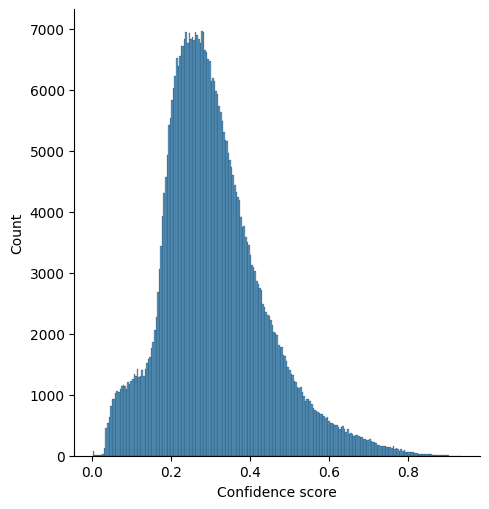

In [2]:
confidence_score_list = []
for line in open("single_pass_scores.txt"):
    experiment_name, confidence_score = line.strip().split()
    confidence_score_list.append(float(confidence_score))

ax = sns.displot(confidence_score_list, legend=False) #, bins=range(0, 185, 5))
ax.set_xlabels("Confidence score")

168640 465000 0.3626666666666667


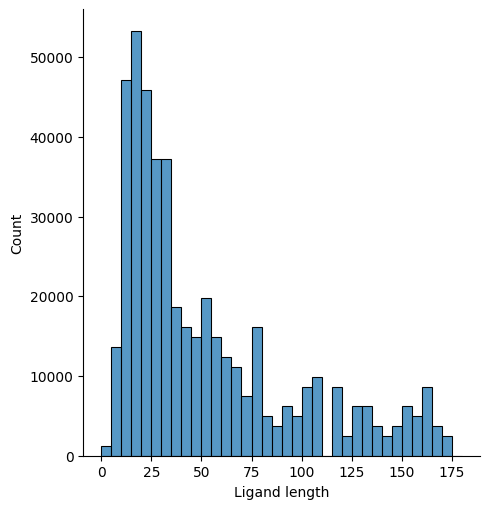

In [3]:
ligand_length_list_all = []
for line in open("single_pass_scores.txt"):
    experiment_name, confidence_score = line.strip().split()
    ligand_length = int(experiment_name.split("_")[-2]) - int(experiment_name.split("_")[-3]) + 1
    ligand_length_list_all.append(ligand_length)


short_ligand_count = 0
for length in ligand_length_list_all:
    if length <= 25:
        short_ligand_count += 1
print(short_ligand_count, len(ligand_length_list_all), short_ligand_count / float(len(ligand_length_list_all)))

ax = sns.displot(ligand_length_list_all, legend=False, bins=range(0, 185, 5))
ax.set_xlabels("Ligand length")

In [4]:
print(len(set(receptors_confident)), len(set(ligand_confident)))

608 259


HLAB_HUMAN 26
NEP_HUMAN 29
AMPE_HUMAN 46
LRC15_HUMAN 29
LCAP_HUMAN 30


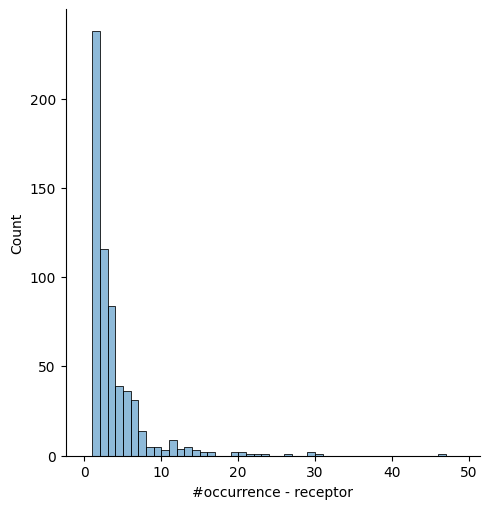

In [5]:
receptors_confident_count = {}
for receptor in receptors_confident:
    if receptor not in receptors_confident_count:
        receptors_confident_count[receptor] = 0
    receptors_confident_count[receptor] += 1
ax = sns.displot(receptors_confident_count.values(), legend=False, bins=range(50))
ax.set_xlabels("#occurrence - receptor")

for receptor, count in receptors_confident_count.items():
    if count > 25:
        print(receptor, count)

VTX-0864359_158_170 35
VTX-0006555_28_108 36
VTX-0859974_20_28 43
VTX-0021927_27_86 35
VTX-0616304_33_43 36
VTX-0866650_24_29 35
VTX-0868490_19_26 35
SMS_HUMAN_70_87 56
VTX-0027325_23_100 41


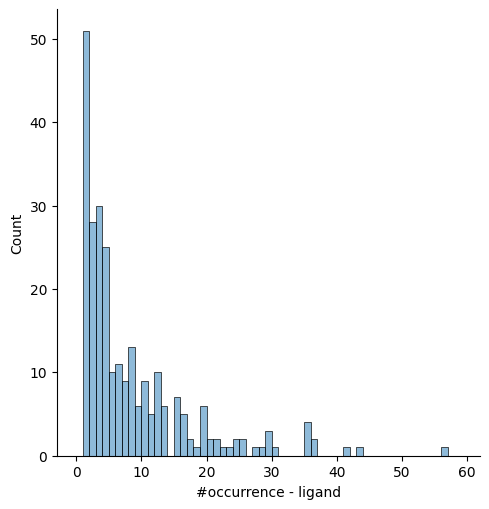

In [6]:
ligand_confident_count = {}
for ligand in ligand_confident:
    if ligand not in ligand_confident_count:
        ligand_confident_count[ligand] = 0
    ligand_confident_count[ligand] += 1
ax = sns.displot(ligand_confident_count.values(), legend=False, bins=range(60))
ax.set_xlabels("#occurrence - ligand")

for ligand, count in ligand_confident_count.items():
    if count > 30:
        print(ligand, count)

1147 2077 0.5522388059701493


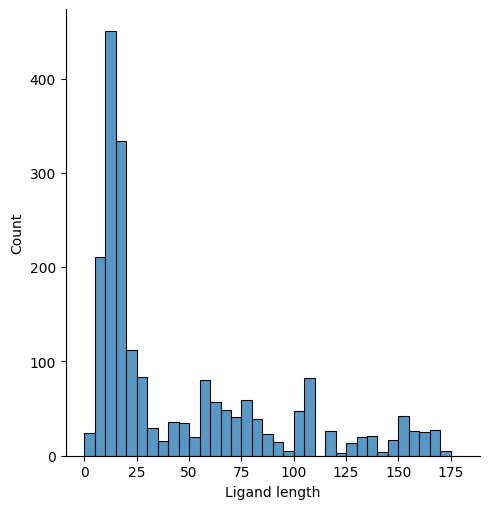

In [7]:
short_ligand_count = 0
for length in ligand_length_list:
    if length <= 25:
        short_ligand_count += 1
print(short_ligand_count, len(ligand_length_list), short_ligand_count / float(len(ligand_length_list)))

ax = sns.displot(ligand_length_list, legend=False, bins=range(0, 185, 5))
ax.set_xlabels("Ligand length")